In [173]:
#@title Импорты
!pip install graphviz
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [0]:
#@title Класс: Граф
import graphviz as gv


class DirectedGraph:
    def __init__(self):
        self.I, self.J, self.H, self.L = [], [], [], []
        self.cost = []
        self.free = -1
        self.vertexLabels = []
        self.vertexProps = []
        self.edgeLabels = []
        self.lol = 0
        self.seen = None

    def getVertexCount(self):
        return len(self.H)

    def addVertex(self, name, label=None):
        self.H.append(-1)
        self.vertexLabels.append(name)
        self.vertexProps.append([label])

    def addEdge(self, tail, head, label=None, cost=True):
        
        if self.getVertexCount() == 0:
            raise Exception('The Graph is empty!')
            
        for i, val in enumerate(self.vertexLabels):
            if tail == val:
                tail = i
        for i, val in enumerate(self.vertexLabels):
            if head == val:
                head = i

        if tail > self.getVertexCount() - 1 or head > self.getVertexCount() - 1:
            raise Exception('Egde parameters are incorrect!')
            
        if self.free == -1:
            self.L.append(self.H[tail])
            self.H[tail] = len(self.I)
            self.I.append(tail)
            self.J.append(head)
            self.cost.append(cost)
        else:
            q = self.free
            self.free = self.L[self.free]
            self.L[q] = self.H[tail]
            self.H[tail] = q
            self.I[q] = tail
            self.J[q] = head
            self.cost[q] = cost
        self.edgeLabels.append(label)

    def removeEdgeByVertices(self, tail, head):
        self.removeEdgeByIndex(self.indexOfEdge(tail, head))

    def removeEdgeByIndex(self, index):
        if index in self.H:
            self.H[self.H.index(index)] = self.L[index]
        else:
            self.L[self.L.index(index)] = self.L[index]
        self.I[index] = -1
        self.J[index] = -1
        self.L[index] = self.free
        self.free = index

    def indexOfEdge(self, tail, head):
        for k, _ in enumerate(self.I):
            if self.vertexLabels[self.I[k]] == tail and self.vertexLabels[self.J[k]] == head:
                return k
    
    def weight(self, tail, head):
        return self.edgeLabels[self.indexOfEdge(tail, head)]
    
    def power(self, index):
        count = 0
        q = self.H[index]
        while q != -1:
            count += 1
            q = self.L[q]
        return count
    
    
    def get_all_conj_edges(self, vertex):
        res = []
        prev = self.H[vertex]
        flag = prev == -1
        while(not flag):
          res.append(prev)
          nextv = self.L[prev]
          flag = nextv == -1
          prev = nextv
        return res
      
    def corresponding_edges(self, edge_list, label):
        res = []
        for edge in edge_list:
          if self.edgeLabels[edge] == label:
            res.append(edge)
        return res
    
    def get_all_conj_vertexes(self, edge_list):
        res = []
        for edge in edge_list:
          res.append(self.J[edge])
        return res
    
    def isConnected2(self, start, end, label):
        #returns if two vertexes are connected via same-named edges      
        if self.seen == None:
          self.seen = [False] * len(self.H)
        elif self.seen[start]:
          return False
        else:
          self.seen[start] = True
        out_edges = self.get_all_conj_edges(start)
        conj_vertexes = self.get_all_conj_vertexes(
            self.corresponding_edges(out_edges, label))
        if end in conj_vertexes:
          self.seen = None
          return True
        else:
          for i in conj_vertexes:
              if self.isConnected(i, end, label):
                return True
          return False
        
    def isConnected(self, start, end, label):
        out_edges = self.get_all_conj_edges(start)
        conj_vertexes = self.get_all_conj_vertexes(
            self.corresponding_edges(out_edges, label))
        if end in conj_vertexes:
          return True
        return False
        
    def get_vertex_by_label(self, label):
        return self.vertexLabels.index(label)

    def visualize(self):
        graph = gv.Digraph()
        for i, _ in enumerate(self.H):
            graph.node(self.vertexLabels[i], self.vertexLabels[i])
            q = self.H[i]
            while q != -1:
                graph.edge(self.vertexLabels[self.I[q]], self.vertexLabels[self.J[q]], label=self.edgeLabels[q])
                q = self.L[q]
        return graph

In [0]:
#@title Класс: Предикат
class Predicate():
    def __init__(self):
        self._space_ = DirectedGraph()
    
    def clear(self):
        self.__init__()
        
    def P(self, x, label):
        self.Q(x, x, label)
    
    def Q(self, x, y, label):
        if x not in self._space_.vertexLabels:
            self._space_.addVertex(x)
        if y not in self._space_.vertexLabels:
            self._space_.addVertex(y)
        self._space_.addEdge(x, y, label)
        
    def check(self, label, args_array):
        start = self._space_.get_vertex_by_label(args_array[0])
        if len(args_array) == 2:
          end = self._space_.get_vertex_by_label(args_array[1])
        else:
          end = start
        return(self._space_.isConnected(start, end, label))
    
    def visualize(self):
        return self._space_.visualize()
      
    def get_vertexes(self):
      return self._space_.vertexLabels

In [0]:
#@title Пример текста для парсинга #2
text2 = '''Город("Москва")
Город("Питер")
Город("Владимир")
естьДорога("Москва","Питер")
естьДорога("Москва","Владимир")
Город("Нижний Новгород")
хуй("Владимир","Нижний Новгород")
exists(x,y: естьДорога(x,y) & ! естьДорога(y,x)) -> естьДорога(y,x)
? !естьДорога("Питер","Владимир")'''

In [0]:
import re
from itertools import product

In [0]:
pred = Predicate()

In [0]:
#@title
file_dummy = ['Город("Алматы")',
              'Город("Астана")',
              'естьДорога("Астана","Алматы")',
              'естьДорога("Алматы","Балык")',
              '? естьДорога("Астана","Астана")']

In [0]:
#@title исКоннектед - прямое соединение вершин, ибо этого хватит: exists сам прокинет все связи дальше, но это не точно

In [0]:
#@title Пример текста для парсинга #1
text = '''Город("Москва")
Город("Питер")
Город("Владимир")
естьДорога("Питер","Москва")
естьДорога("Москва","Владимир")
Город("Нижний Новгород")
естьДорога("Владимир","Нижний Новгород")
естьДорога("Великий Новгород","Питер")
естьДорога("Русландия","Великий Новгород")
exists( x , y : естьДорога(x,y) & !естьДорога(y,x)) -> естьДорога(y,x)
? естьДорога("Питер","Владимир")
? Город("Москва")'''

In [0]:
#@title Пример текста для парсинга #1
text = '''студент("Александр")
студент("Николай")
студент("Руслан")
студент("Никита")
дружба("Александр", "Никита")
дружба("Никита", "Николай")
дружба("Руслан", "Александр")
exists( x, y : дружба(x, y) & !дружба(y,x)) -> дружба(y, x)
exists( x, y, z : дружба(x, y) & дружба(y,z) & !дружба(x,z) & !студент(x,z)) -> дружба(x, z)
'''

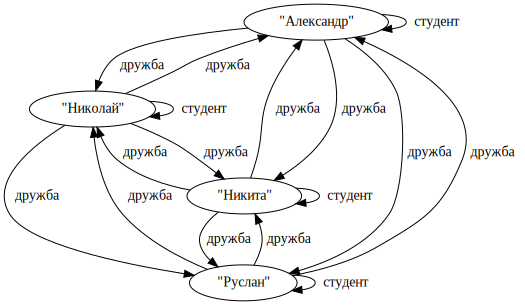

In [212]:
pred = Predicate()
pred.clear()
file_dummy = text.splitlines()
for i, line in enumerate(file_dummy):
#   try:
#     #print("line # ", i+1)
    parse(line)
#   except Exception as e:
#     print('{} in line {}'.format(e, i + 1))
#     break
pred.visualize()

In [209]:
pred.check("аутист", ['"Николай"'])

False

In [0]:
def parse(line):
  if line.strip()[0] == '?':
    question_mode(line)
  elif 'exists' in line:
    changes = True
    while(changes):
      changes = exist_mode(line)
  else:
    statement_mode(line)

In [0]:
def statement_mode(line):
  #supports only one statement 
  #return TUPLE where the first el is name of predicate, the second - 
  #list of all it's terms
  operator_name = get_operator_name(line)
  args_line = inside_first_pars(line)
  args = derive_operands(args_line)
  if len(args) == 1:
    if args[0] == '':
       raise Exception('not supported number of arguments: 0')
    pred.P(args[0], operator_name)
  elif len(args) == 2:
    pred.Q(args[0], args[1], operator_name)
  else:
    raise Exception('not supported number of arguments: {}'.format(len(args)))

In [0]:
def question_mode(line):
    print(evaluate(line))

In [0]:
def exist_mode(line):

    if '->' not in line:
      raise Exception('Wrong deduction syntaxis')
    left_side, right_side = line.split('->')
    left_operators = derive_list_of_operators(left_side)
    exists_matching_vars = {}
    for i,exargs in enumerate(left_operators):
        try:
          operands, formula = exargs[1].split(':')
        except:
          raise Exception('Invalid syntax')
        
        operands = derive_operands(operands)
        if operands[0] == '':
          raise Exception('not supported number of arguments')
          
        total_vertecies_set = []
        for i in range(len(operands)):
          total_vertecies_set.append(pred.get_vertexes())
        for combination in product(*total_vertecies_set):
          replaced = formula
          for i in range(len(combination)):
            replaced = replaced.replace(operands[i], combination[i])
          
          if evaluate(replaced):
            for i in range(len(combination)):
              exists_matching_vars[operands[i]] = combination[i]
            break
         
    if len(exists_matching_vars) == 0:
      return False
    right_operators_bounds = inside_pars(right_side)
    right_operators = []
    for start, end in right_operators_bounds:
      right_operators.append(right_side[:end+1])
      right_side = right_side[end:]
      
    for statement in right_operators:
      replaced = statement
      for variable in exists_matching_vars:
        replaced = replaced.replace(variable, exists_matching_vars[variable])
      statement_mode(replaced)
#     print(exists_matching_vars)
    return True

In [0]:
def evaluate_predicate(name, args):
    operands = derive_operands(args)
    if len(operands) == 0 or len(operands) > 2:
      raise Exception('Incorrect num of args')
    return pred.check(name, operands)

def and_(left, right):
    if isinstance(left, bool) and isinstance(right, bool):
      return left and right
    elif isinstance(left, set) and isinstance(right, set):
      return left.intersection(right)
    else:
      raise Exception('Types of predicates do not match')
      
def or_(left, right):
    if isinstance(left, bool) and isinstance(right, bool):
      return left or right
    elif isinstance(left, set) and isinstance(right, set):
      return left.union(right)
    else:
      raise Exception('Types of predicates do not match')
      
def not_(right):
    if isinstance(right, bool):
      return not right
    else:
      raise Exception('Not supported format of operand in not opeartor')

In [0]:
def get_operator_name(line):
    #return THE FIRST operator name in string
    try:
        return re.match(r'.*?(\w+?)\(', line).groups()[0]
    except:
        raise Exception('Operator name not valid')
        return ''

In [0]:
def derive_list_of_operators(line):
    #return LIST of operators, so the same names are allowed
    par_bnds = inside_pars(line)
    operators = []
    operators.append([get_operator_name(line[:par_bnds[0][0]]),line[par_bnds[0][0]:par_bnds[0][1]]])
    for i in range(1,len(par_bnds)):
        operators.append([get_operator_name(line[par_bnds[i-1][1]:par_bnds[i][0]]),line[par_bnds[i][0]:par_bnds[i][1]]])
    return operators

In [0]:
def inside_first_pars(line):
    #returns everything inside THE FIRST pars in line
    opens = 0
    start = -1
    end = -1
    for i, ch in enumerate(line):
        if ch == '(':
            if opens == 0:
                start = i + 1
            opens += 1
        elif ch == ')':
            opens -= 1
            if opens == 0:
                end = i
                break
    return line[start:end]

In [0]:
def inside_pars(line):
    #returns bounds of all pars
    opens = 0
    start = -1
    end = -1
    bnds = []
    for i, ch in enumerate(line):
        if ch == '(':
            if opens == 0:
                start = i + 1
            opens += 1
        elif ch == ')':
            opens -= 1
            if opens == 0:
                end = i
                bnds.append((start, end))
    return bnds

In [0]:
def evaluate(line):
    res = split(line, '|')
    if res:
        left, right = res
        return or_(evaluate(left), evaluate(right))
    res = split(line, '&')
    if res:
        left, right = res
        return and_(evaluate(left), evaluate(right))
    res = split(line, '!')
    if res:
        right = res[1]
        return not_(evaluate(right))
    res = unpack_parenthesis(line)
    if res != '':
        return evaluate(res)
    res = get_predicate(line)
    if res != (None, ''):
        name, args = res
        return evaluate_predicate(name, evaluate(args))
    return line

def get_predicate(line):
    closed = 0
    start = -1
    end = -1
    name = None
    for i, ch in enumerate(reversed(line)):
        if ch == ')':
            if closed == 0:
                start = i + 1
            closed += 1
        elif ch == '(':
            closed -= 1
            if closed == 0:
                end = i
                symbol = re.match(r'\w*',line[len(line)-i-2]).group()
                if (symbol != ''):
                    name = re.search(r'\w*$',line[:len(line)-end-1]).group()
                    break
                else:
                    start = -1
                    end = -1
    return name, line[len(line)-end:len(line)-start]

def unpack_parenthesis(line):
    closed = 0
    start = -1
    end = -1
    for i, ch in enumerate(reversed(line)):
        if ch == ')':
            if closed == 0:
                start = i + 1
            closed += 1
        elif ch == '(':
            closed -= 1
            if closed == 0:
                end = i
                if (re.match(r'\w*',line[len(line)-i-2]).group() == ''):
                    break
                else:
                    start = -1
                    end = -1
    return line[len(line)-end:len(line)-start]

def split(line, symb):
    closed = 0
    for index, i in enumerate(reversed(line)):
        if i == ')':
            closed += 1
        elif i == '(':
            closed -= 1
        elif i == symb and closed == 0:
            return line[:len(line)-index-1], line[len(line)-index:]
    return None

def derive_operands(arg_line):
    #return SIMPLE operands in line
    return [x.strip() for x in arg_line.split(',')]